In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

from wordcloud import WordCloud

from PIL import Image


%matplotlib inline

In [83]:
THUMBS_UP_FILE = ('C:/Users/Nyambura/Desktop/Personal Data-Science-Projects/SMS Spam Detection/thumbs-up.png')
THUMBS_DOWN_FILE = ('C:/Users/Nyambura/Desktop/Personal Data-Science-Projects/SMS Spam Detection/thumbs-down.png')

In [3]:
sms = pd.read_csv('C:/Users/Nyambura/Desktop/Personal Data-Science-Projects/SMS Spam Detection/spam.csv')

In [4]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Drop unwanted columns

In [5]:
print(list(sms.columns))

['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']


In [6]:
sms = sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)
sms = sms.rename(columns = {'v1':'label','v2':'message'})
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Maxiumum length of message

In [7]:
print(len(sms))

5572


### Number of observations in each label spam and ham

In [8]:
sms.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [15]:
sms.describe()

,label,length
count,5572.000000,5572.000000
mean,0.134063,80.058327
std,0.340751,59.623937
min,0.000000,2.000000
25%,0.000000,36.000000
50%,0.000000,61.000000
75%,0.000000,121.000000
max,1.000000,910.000000


In [16]:
sms.isnull().sum()

label      0
message    0
length     0
dtype: int64

In [17]:
(sms.message.str.len() == 0).any()

False

In [18]:
sms[(sms.message.str.len() == 0)].index

Int64Index([], dtype='int64')

## Add DocID to track messages

In [19]:
document_ids = range(0, len(sms.index))
document_ids

range(0, 5572)

In [21]:
document_ids = range(0, len(sms.index))
sms['DocID'] = document_ids

In [22]:
sms['FILE_NAME'] = sms.index
sms.set_index('DocID', inplace = True)

In [23]:
sms.head()

,label,message,length,FILE_NAME
DocID,,,,
0,0,"Go until jurong point, crazy.. Available only ...",111,0
1,0,Ok lar... Joking wif u oni...,29,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,2
3,0,U dun say so early hor... U c already then say...,49,3
4,0,"Nah I don't think he goes to usf, he lives aro...",61,4


In [24]:
sms.drop('FILE_NAME', axis=1, inplace=True)

In [25]:
sms.head()

,label,message,length
DocID,,,
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
sms.label.value_counts()

0    4825
1     747
Name: label, dtype: int64

In [29]:
amounts_of_spam = sms.label.value_counts()[1]
amounts_of_ham = sms.label.value_counts()[0]

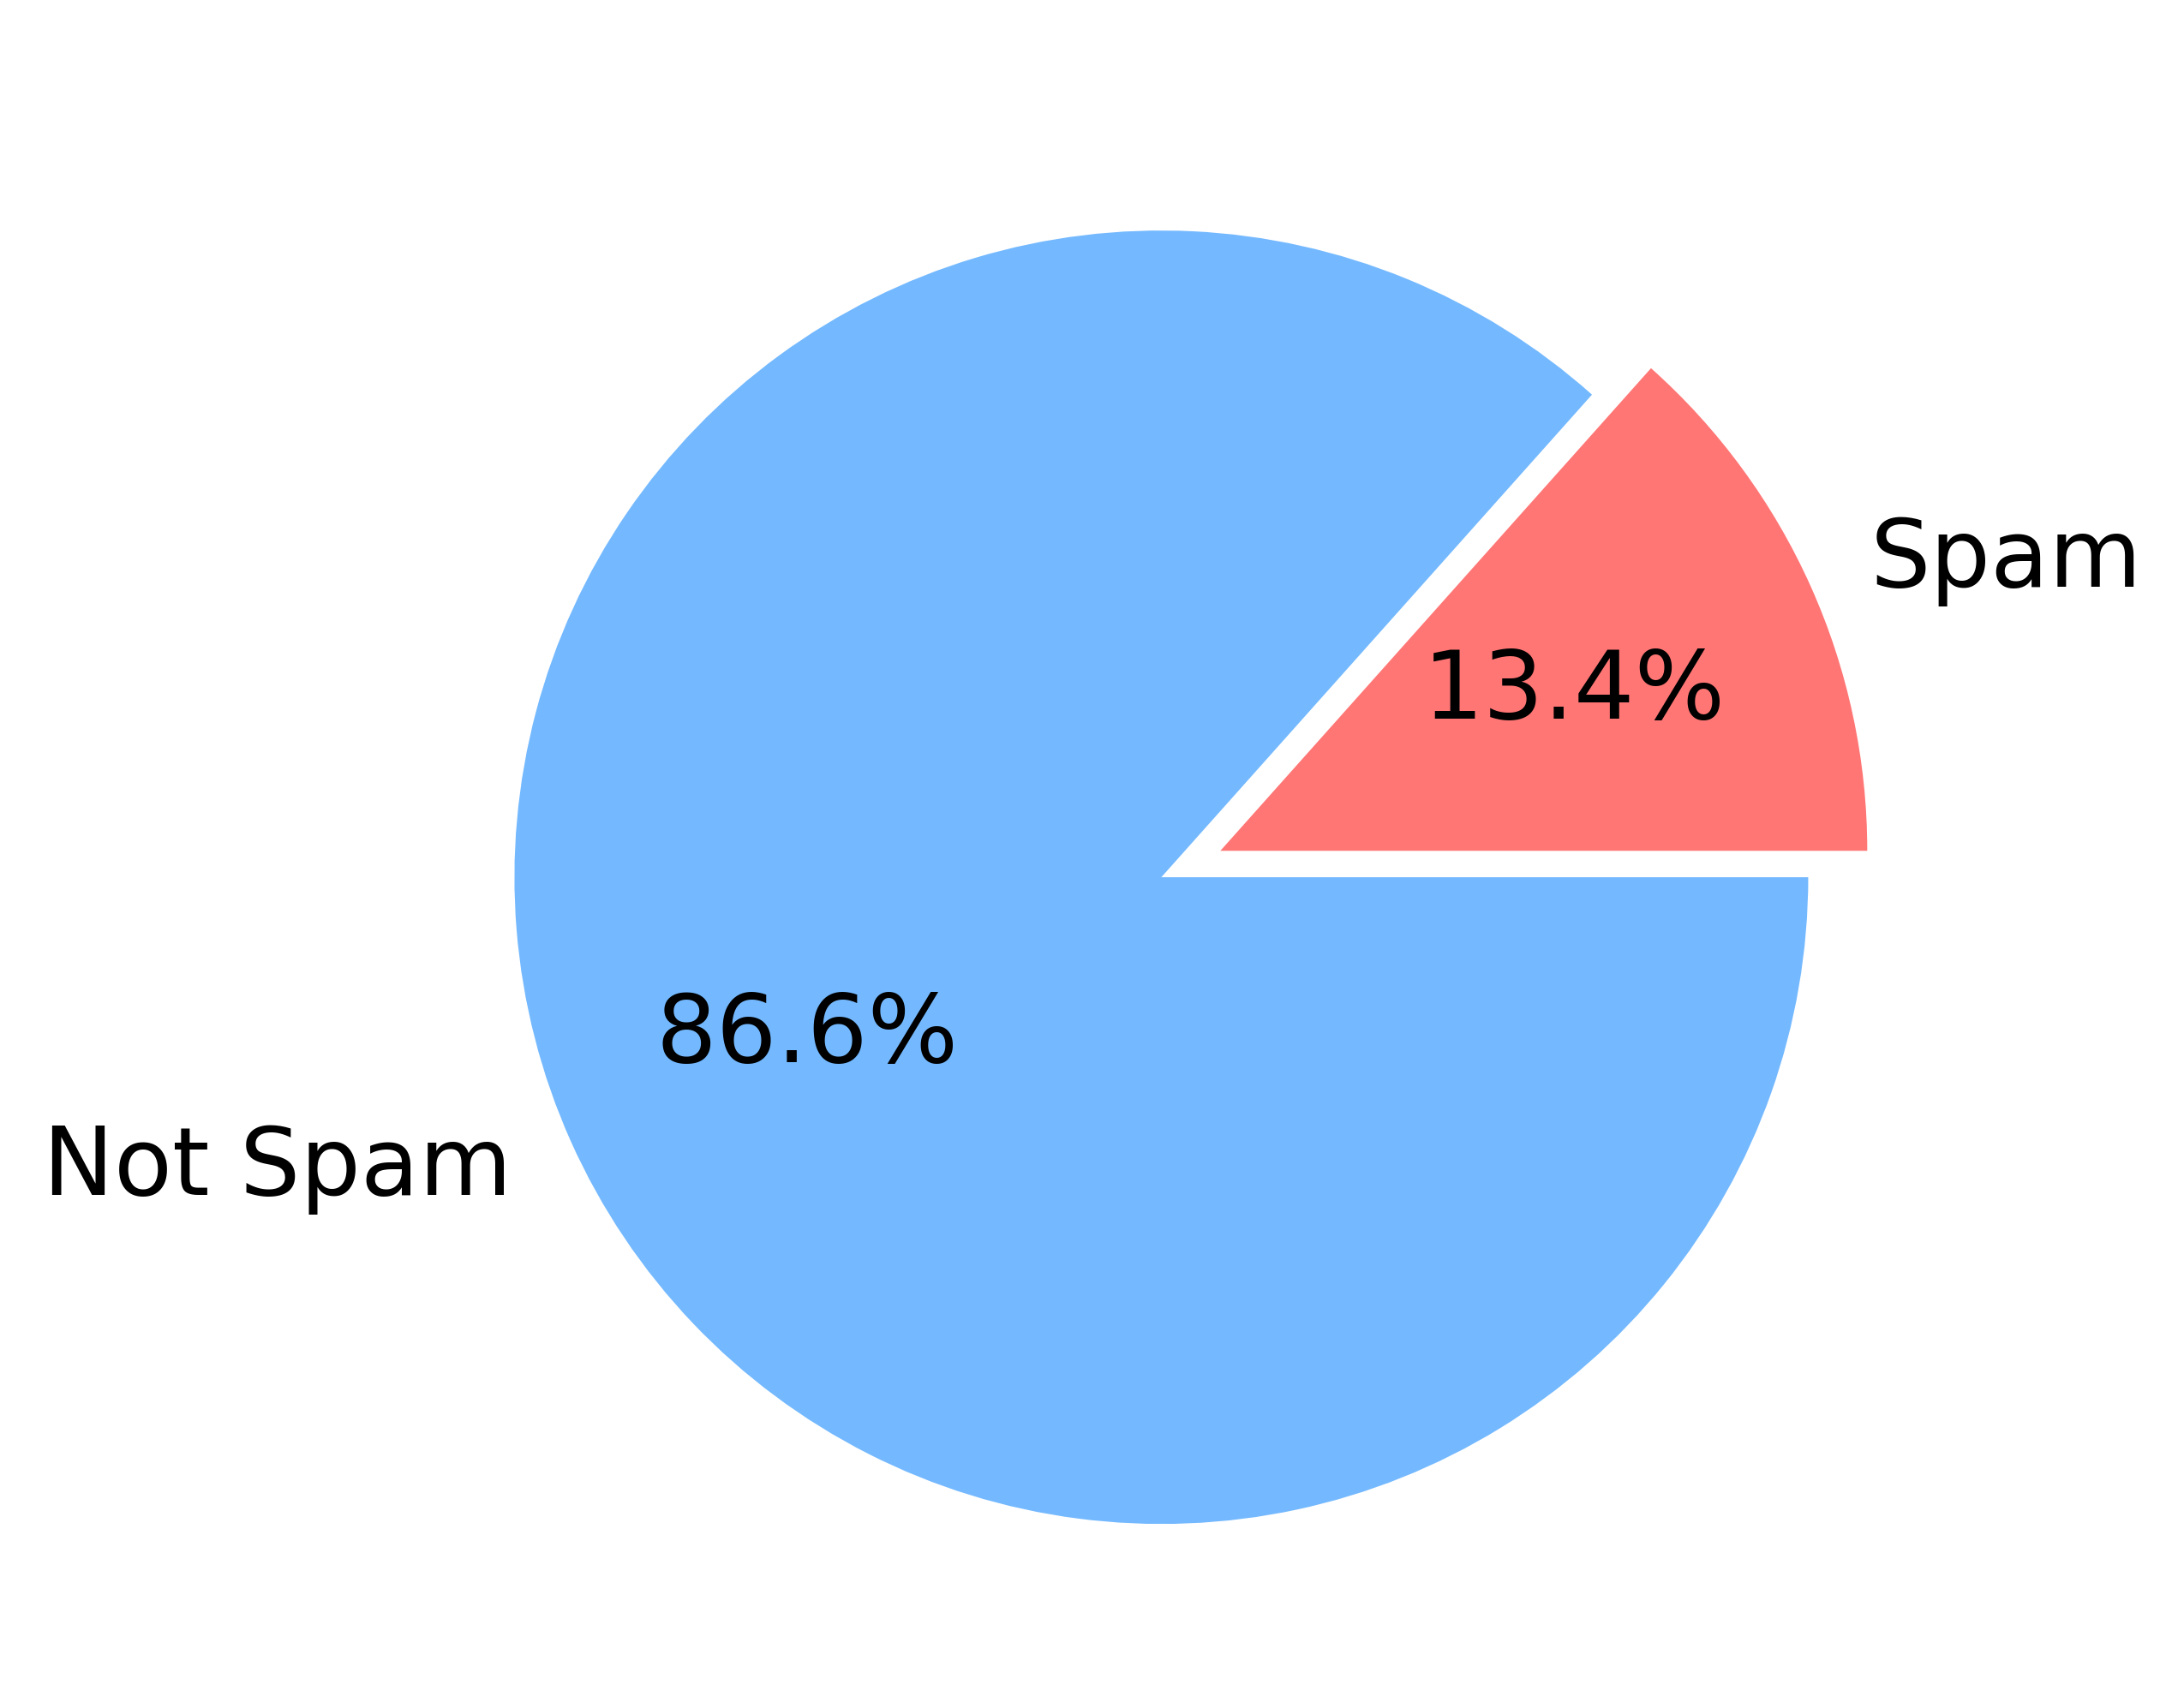

In [30]:
label_names = ['Spam', 'Not Spam']
sizes = [amounts_of_spam, amounts_of_ham]

custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize = (5,5), dpi = 500)
plt.pie(sizes, labels = label_names, 
        textprops = {'fontsize': 16}, 
        autopct = '%1.1f%%', 
        colors = custom_colours, 
        explode = [0, 0.1])
plt.show()

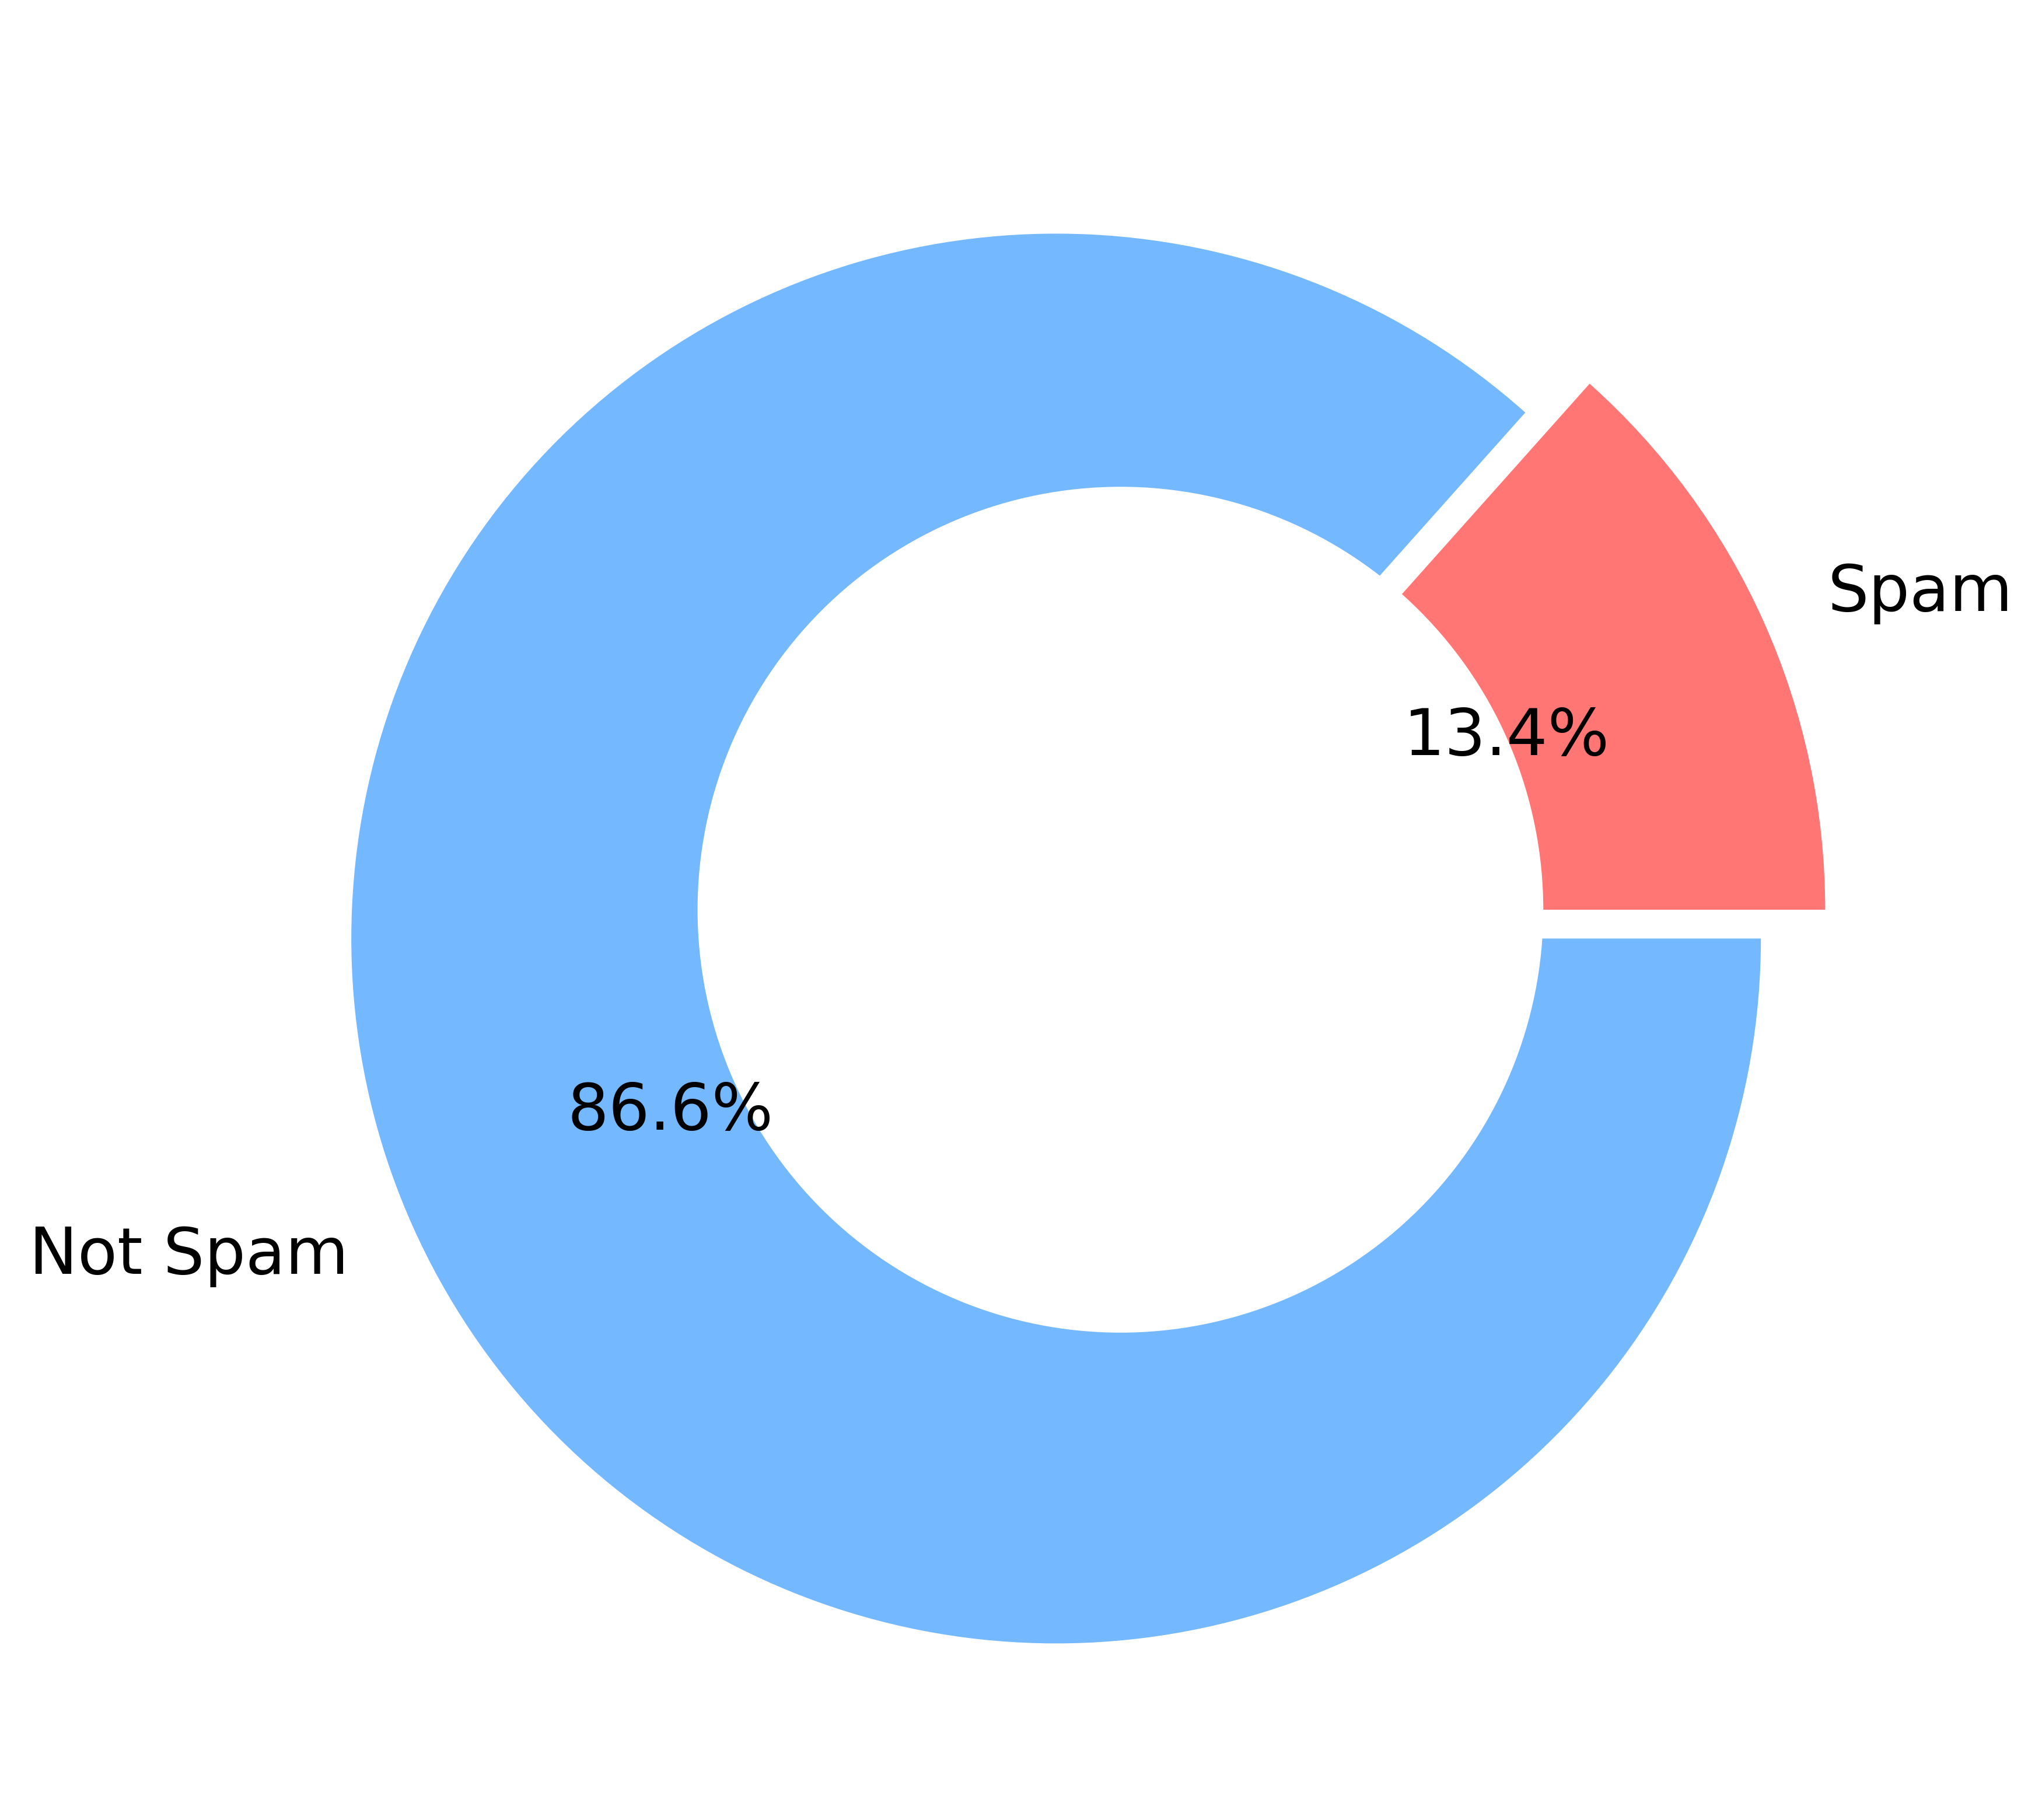

In [31]:
label_names = ['Spam', 'Not Spam']
sizes = [amounts_of_spam, amounts_of_ham]

custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize = (8,8), dpi = 500)
plt.pie(sizes, labels = label_names, 
        textprops = {'fontsize': 16}, 
        autopct = '%1.1f%%', 
        colors = custom_colours,
        explode = [0, 0.1]) 
#         pctdistance = 0)

# draw circle
centre_circle = plt.Circle((0, 0), radius = 0.6, fc = 'white')
plt.gca().add_artist(centre_circle)

plt.show()

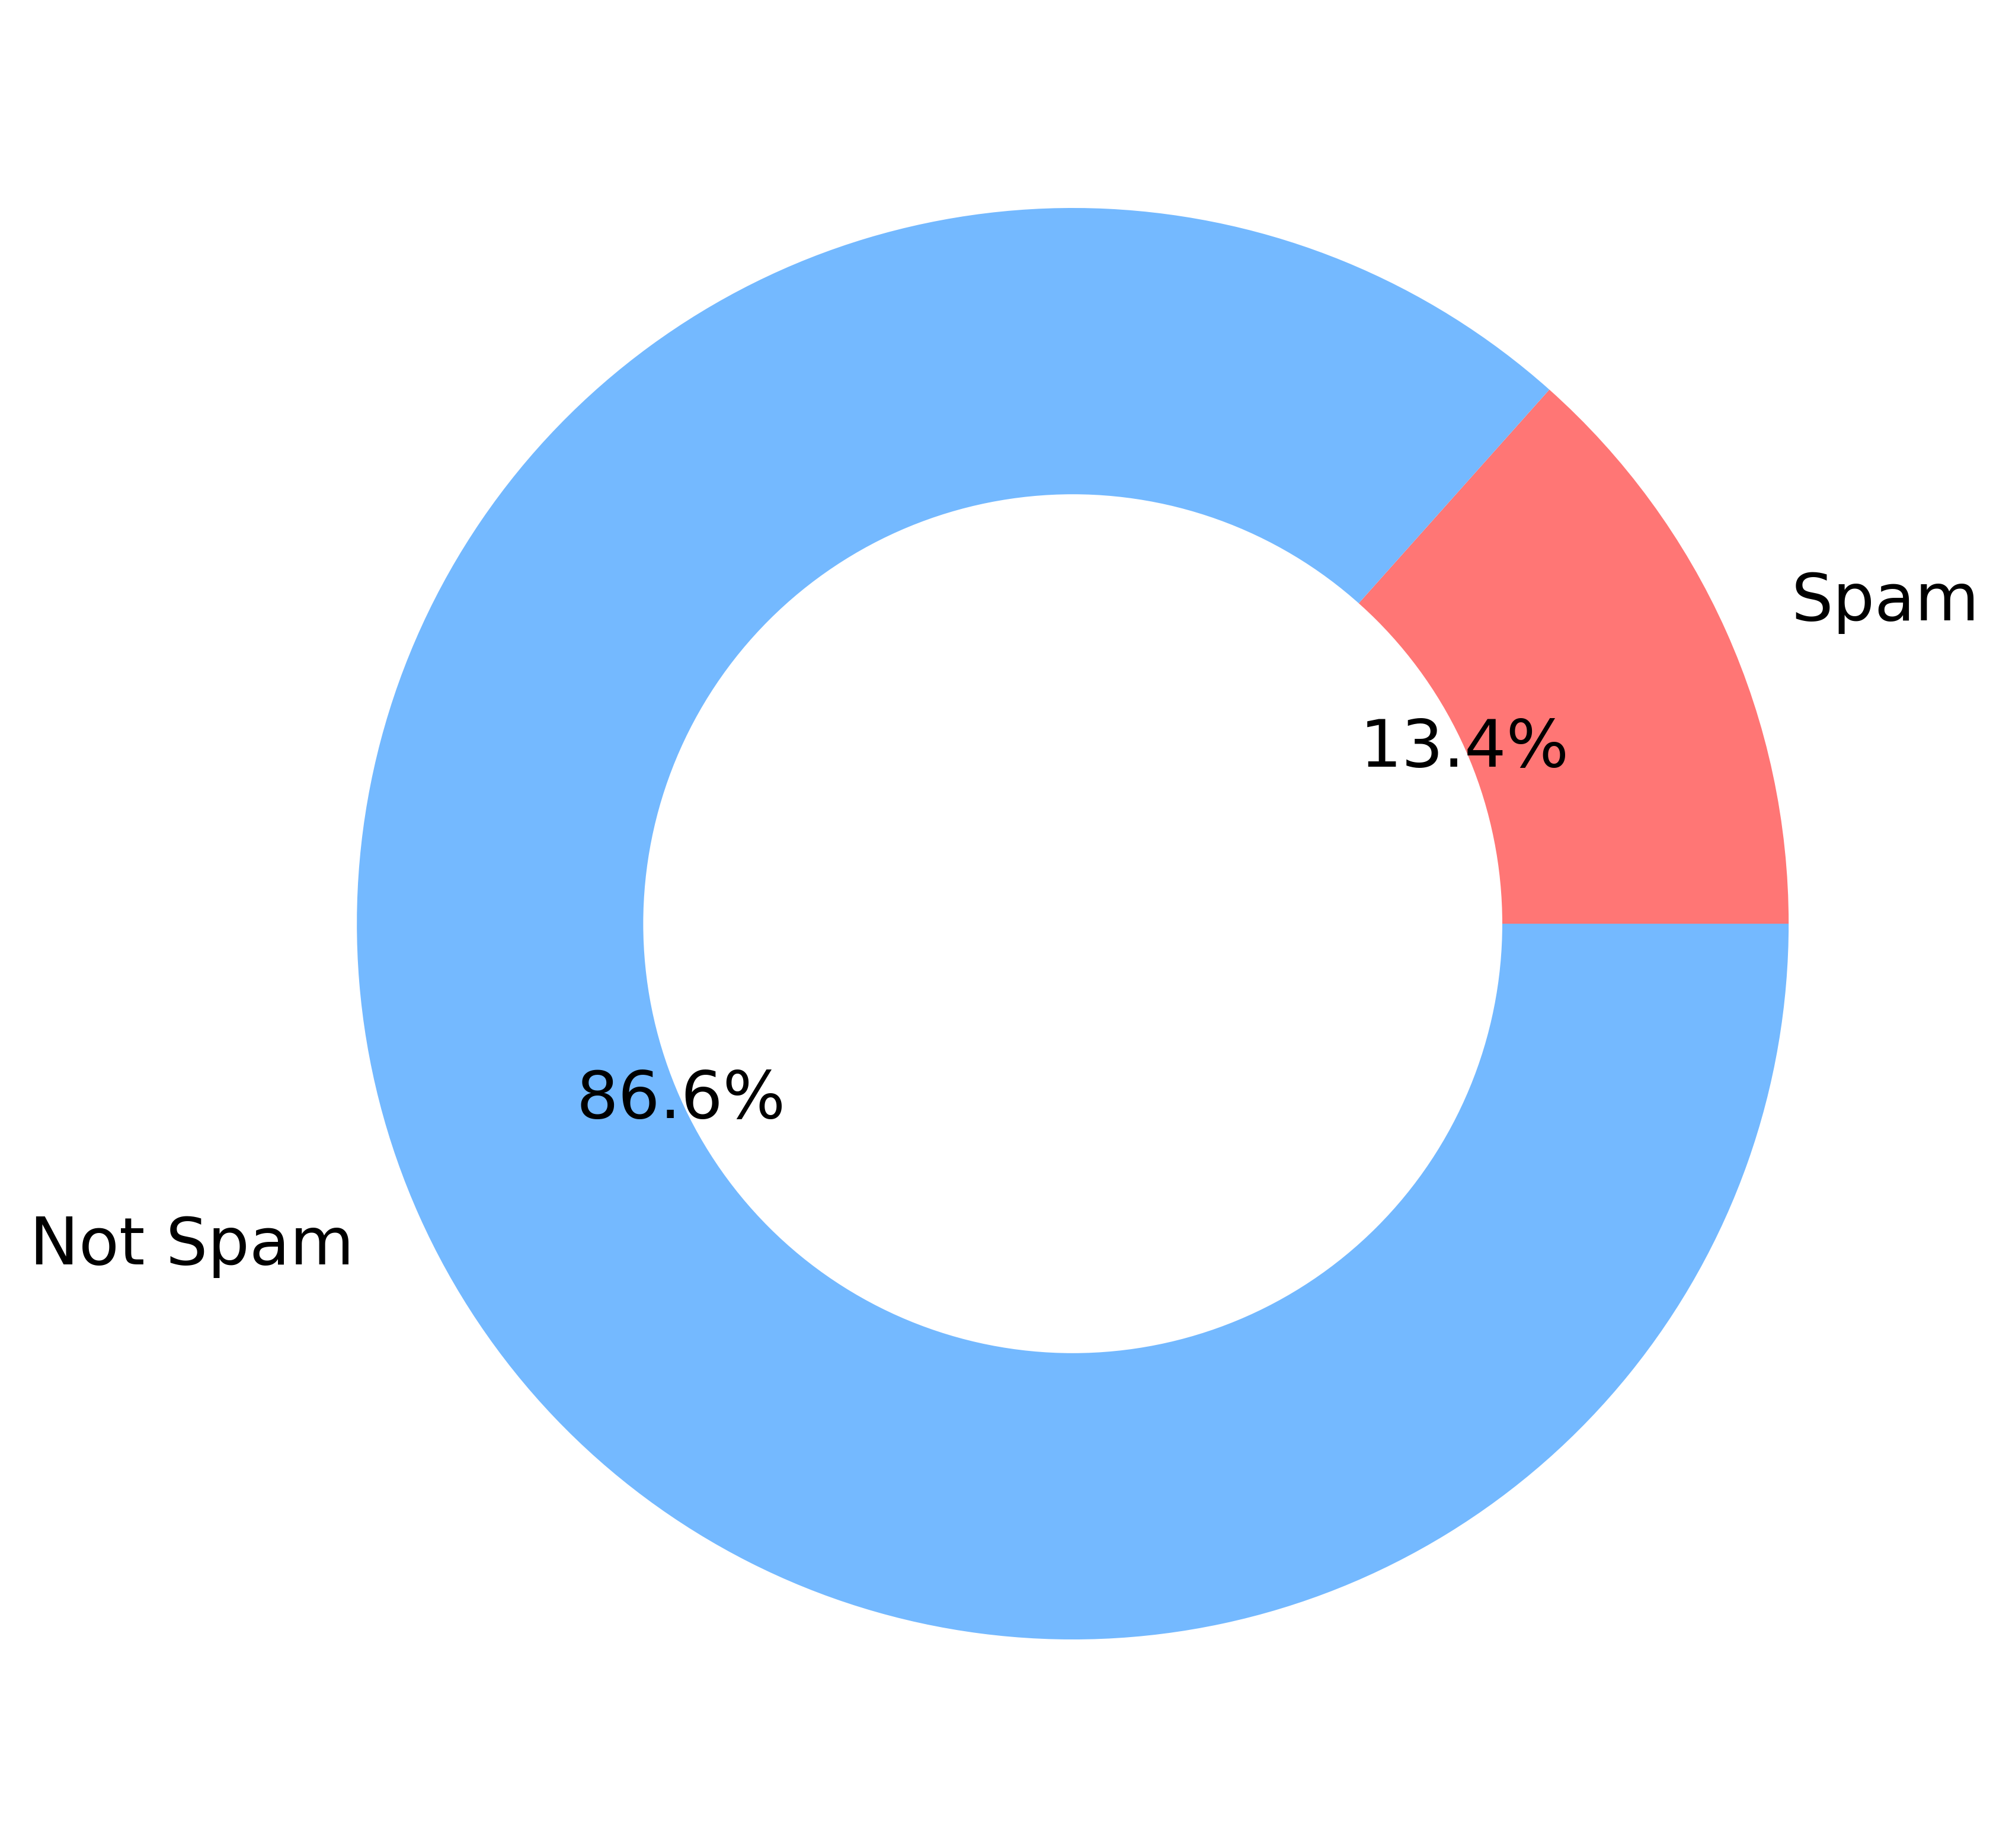

In [32]:
label_names = ['Spam', 'Not Spam']
sizes = [amounts_of_spam, amounts_of_ham]

custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize = (8,8), dpi = 500)
plt.pie(sizes, labels = label_names, 
        textprops = {'fontsize': 16}, 
        autopct = '%1.1f%%', 
        colors = custom_colours) 
#         pctdistance = 0)

# draw circle
centre_circle = plt.Circle((0, 0), radius = 0.6, fc = 'white')
plt.gca().add_artist(centre_circle)

plt.show()

In [11]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

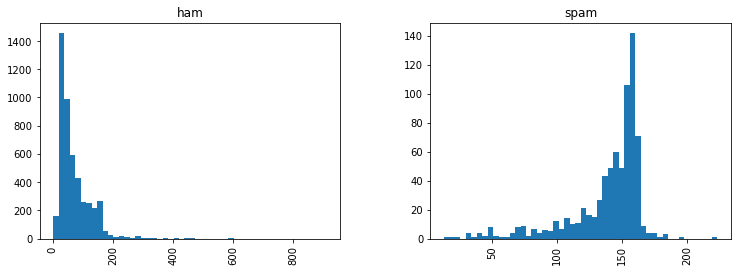

In [12]:
sms.hist(column='length', by='label', bins=50,figsize=(12,4))

In [13]:
sms.loc[:,'label'] = sms.label.map({'ham':0, 'spam':1})
print(sms.shape)
sms.head()

(5572, 3)


,label,message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


## Bag of Words Approach

### 1. Convert all strings to their lower case form

### 3. Tokenization

In [40]:
msg = 'Hello, how are you!'

msg.lower()

'hello, how are you!'

### Download NLTK Resources(Tokenizer & Stopwords)

In [36]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nyambura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nyambura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
words = word_tokenize(msg.lower())
print(words)

['hello', ',', 'how', 'are', 'you', '!']


### 2. Remove all punctuations

In [49]:
'p'.isalpha()

True

In [51]:
'?'.isalpha()

False

In [52]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [56]:

filtered_words = []

for word in words:
    filtered_words.append(word.translate(str.maketrans("","", string.punctuation)))
print(filtered_words)

['hello', '', 'how', 'are', 'you', '']


In [62]:
def clean_message(message):
    message = message.lower()
    words = word_tokenize(message)
    filtered_words = []
    for word in words:
        if word.isalpha():
            filtered_words.append(word)
    return filtered_words

nested_sms = sms['message'].apply(clean_message)
print(nested_sms)

DocID
0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, a, wkly, comp, to, win, fa, ...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, do, think, he, goes, to, usf, he, liv...
                              ...                        
5567    [this, is, the, time, we, have, tried, contact...
5568            [will, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, any, othe...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: message, Length: 5572, dtype: object


In [59]:
sms[sms.label == 1].head()

,label,message,length
DocID,,,
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
5,1,FreeMsg Hey there darling it's been 3 week's n...,147
8,1,WINNER!! As a valued network customer you have...,157
9,1,Had your mobile 11 months or more? U R entitle...,154
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136


In [60]:
sms[sms.label == 1].shape

(747, 3)

In [61]:
doc_ids_spam = sms[sms.label == 1].index
doc_ids_ham = sms[sms.label == 0].index

In [64]:
nested_sms_ham = nested_sms.loc[doc_ids_ham]
nested_sms_ham.shape

(4825,)

In [68]:
nested_sms_spam = nested_sms.loc[doc_ids_spam]
nested_sms_spam.shape

(747,)

In [69]:
flat_sms_ham = [item for sublist in nested_sms_ham for item in sublist]
normal_words = pd.Series(flat_sms_ham)

normal_words.shape[0] # Total number of words in non spam messages

66303

In [71]:
# Unique Words
flat_sms_ham = [item for sublist in nested_sms_ham for item in sublist]
normal_words = pd.Series(flat_sms_ham).value_counts()

normal_words.shape[0] # Total number of unique words in non spam messages

6441

In [72]:
# 10 Most Common Words
normal_words[:10]

i      2851
you    1932
to     1554
the    1118
a      1048
u       979
and     855
in      814
me      774
my      747
dtype: int64

In [73]:
flat_sms_spam = [item for sublist in nested_sms_spam for item in sublist]
spammy_words = pd.Series(flat_sms_spam)

spammy_words.shape[0] # Total number of words in spam messages

14589

In [74]:
# Unique Spam Words
flat_sms_spam = [item for sublist in nested_sms_spam for item in sublist]
spammy_words = pd.Series(flat_sms_spam).value_counts()

spammy_words.shape[0] # Total number of unique words in non spam messages

1812

In [75]:
# 10 Most Common Words in spam Messages
spammy_words[:10]

to      687
a       375
call    346
you     296
your    263
free    219
the     206
for     202
now     199
or      188
dtype: int64

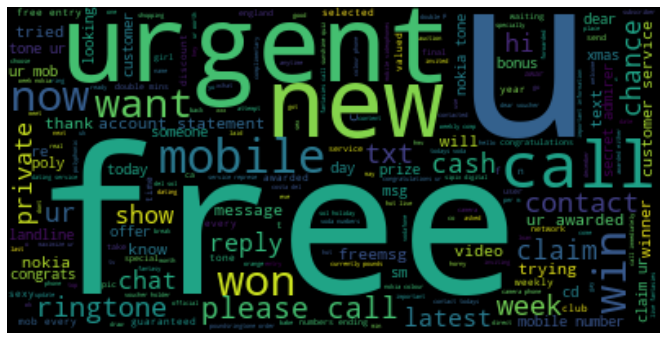

In [78]:
word_cloud = WordCloud().generate(nested_sms_spam.to_string())
plt.figure(figsize = (12,6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

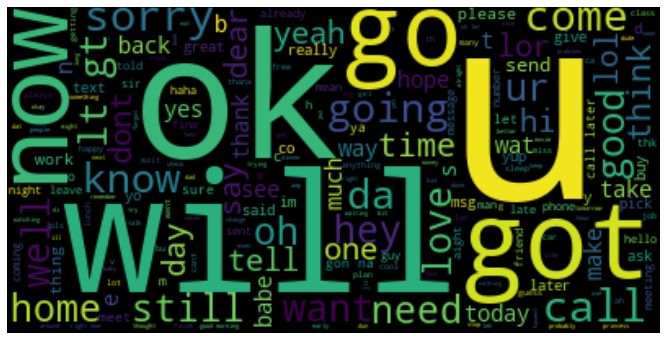

In [79]:
word_cloud = WordCloud().generate(nested_sms_ham.to_string())
plt.figure(figsize = (12,6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

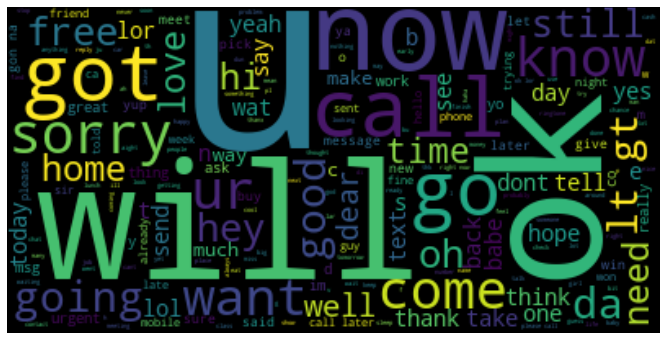

In [80]:
word_cloud = WordCloud().generate(nested_sms.to_string())
plt.figure(figsize = (12,6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

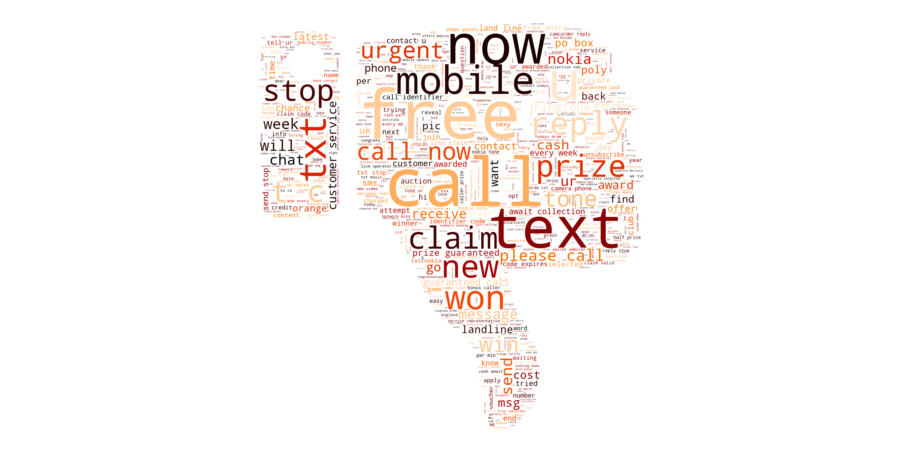

In [85]:

icon_spam = Image.open(THUMBS_DOWN_FILE)
image_mask_spam = Image.new(mode = 'RGB', 
                       size = icon_spam.size, 
                       color = (255, 255, 255))

image_mask_spam.paste(icon_spam, box = icon_spam)

rgb_array = np.array(image_mask_spam)

spam_string = ' '.join(flat_sms_spam)

word_cloud = WordCloud(mask = rgb_array, 
                       background_color = 'white', 
                       max_words = 800,
                       colormap = 'gist_heat')

word_cloud.generate(spam_string)

plt.figure(figsize = (16,10))
plt.imshow(word_cloud, 
           interpolation = 'bilinear')
plt.axis('off')
plt.show()

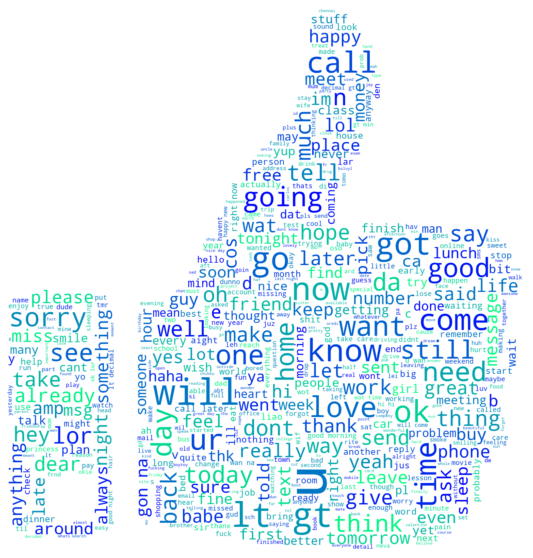

In [86]:

icon_ham = Image.open(THUMBS_UP_FILE)
image_mask_ham = Image.new(mode = 'RGB', 
                       size = icon_ham.size, 
                       color = (255, 255, 255))

image_mask_ham.paste(icon_ham, box = icon_ham)

rgb_array = np.array(image_mask_ham)

ham_string = ' '.join(flat_sms_ham)

word_cloud = WordCloud(mask = rgb_array, 
                       background_color = 'white', 
                       max_words = 500,
                      colormap = 'winter')

word_cloud.generate(ham_string)

plt.figure(figsize = (16,10))
plt.imshow(word_cloud, 
           interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Data Preprocessing with CounterVectorizer()

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv.fit(sms.message)
cv.get_feature_names()

['00',
 '000',
 '000pes',
 '008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02072069400',
 '02073162414',
 '02085076972',
 '021',
 '03',
 '04',
 '0430',
 '05',
 '050703',
 '0578',
 '06',
 '07',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07781482378',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '07880867867',
 '0789xxxxxxx',
 '07946746291',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '08',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '083',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '084

In [92]:
sms_array = cv.transform(sms.message).toarray()
sms_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [93]:
frequency_matrix = pd.DataFrame(data = sms_array, columns = cv.get_feature_names())
frequency_matrix

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zebra,zed,zeros,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(sms.message, 
                                                    sms.label, 
                                                    test_size = 0.2, 
                                                    random_state = 1)

training_data = cv.fit_transform(x_train)
testing_data = cv.transform(x_test)

## Implementing Naive Bayes Algorithm

In [95]:
from sklearn.naive_bayes import MultinomialNB

naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)
MultinomialNB(alpha = 1.0, class_prior = None, fit_prior = True)
predictions = naive_bayes.predict(testing_data)

## Evaluating our SMS Spam Detection Model

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy Score: {}'.format(accuracy_score(y_test, predictions)))
print('Precision Score: {}'.format(precision_score(y_test, predictions)))
print('Recall Score: {}'.format(recall_score(y_test, predictions)))
print('F1 Score: {}'.format(f1_score(y_test, predictions)))

Accuracy Score: 0.9856502242152466
Precision Score: 0.9424460431654677
Recall Score: 0.9424460431654677
F1 Score: 0.9424460431654677
